In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt

In [2]:
#reading an image
img = cv2.imread('./DataSet/lionel messi/1.jpg')
img.shape
#3rd dimension in below parenthesis is the rgb value (color), if image is grey then there is no rgb value

(498, 332, 3)

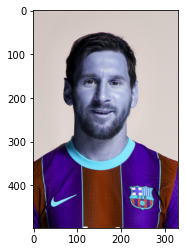

In [3]:
plt.imshow(img)

In [4]:
#converting a colored image into gray (removing the 3rd dimension in shape tuple)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(498, 332)

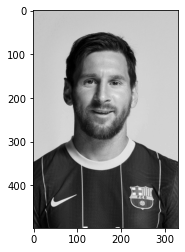

In [5]:
plt.imshow(gray,cmap='gray')

In [6]:
gray

array([[193, 195, 196, ..., 203, 203, 203],
       [195, 195, 196, ..., 203, 203, 204],
       [197, 196, 196, ..., 203, 203, 204],
       ...,
       [ 52,  53,  49, ...,  64,  57,  54],
       [ 51,  48,  48, ...,  64,  59,  55],
       [ 54,  48,  48, ...,  65,  60,  56]], dtype=uint8)

### haar cascade is a tool to detect different objects like eyes, face, etc. We are using predefined haar cascade classifiers in this project

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
print(type(faces),type(faces[0]))
faces

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


array([[ 80, 102, 162, 162]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(80, 102, 162, 162)

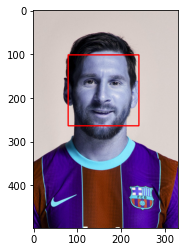

In [9]:
#create a rectangle around the face of given dimension (x+y),... and RGB color(255,0,0) and 2 is the thickness of rectangle
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

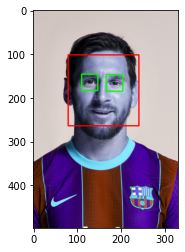

In [10]:
#Generating cropped image

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#running a for loop because "faces" can have multiple face (extracted from multiple images from the dataSet)
for (x,y,w,h) in faces:
    #detecting the face (as we did in face_img variable above)
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        #detecting the eyes (for loop because a person can have multiple eyes), here rgb is green
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap = 'gray')
plt.show()

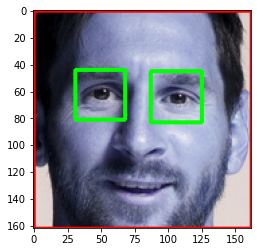

In [11]:
plt.imshow(roi_color,cmap = 'gray')

In [12]:
#Crop the iamge if 2 eyes are visible, this function is same as block 12 code
def get_cropped_img_if_2_eyes(img_path):
    result = []
    
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            result.append(roi_color)
    return result

#### Showing an original image and then its cropped face

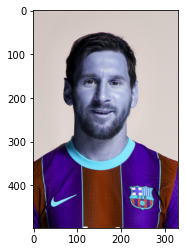

In [13]:
original_img = cv2.imread('./DataSet/lionel messi/1.jpg')
plt.imshow(original_img)

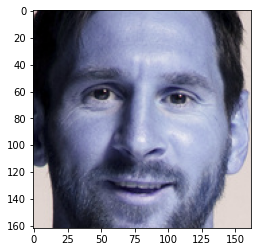

In [14]:
cropped_img = get_cropped_img_if_2_eyes('./DataSet/lionel messi/1.jpg')

for face_img in cropped_img:
    plt.imshow(face_img)

#### An image where 2 eyes are not visible, hence cropped image will not be generated (get_cropped_img_if_2_eyes will return None)

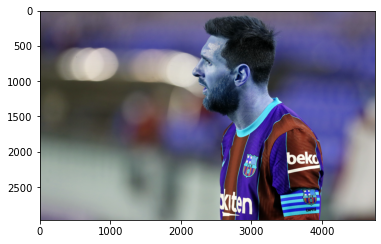

In [15]:
org_obstructed_img = cv2.imread('./DataSet/lionel messi/2.jpg')
plt.imshow(org_obstructed_img)

In [16]:
cropped_obstructed_img = get_cropped_img_if_2_eyes('./DataSet/lionel messi/2.jpg')
#nothing will be returned by above function, since 2 eyes are not visible
for face_img in cropped_obstructed_img:
    if face_img is not None:
        plt.imshow(face_img)

#### Creating the folder where the cropped faces of all celebrities will be stored (in sub folders)

In [17]:
path_to_data = './DataSet/'
path_to_cr_data = './DataSet/Cropped/'

In [18]:
#if 'Cropped' folder already exists in DataSet folder then remove it
import os
import shutil

if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)

#### Storing the paths of each folder containing the photos of a particular celebrity

In [19]:
#this list will store the paths to each folder(containing pics of celebrities) in the DataSet folder
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

#make new folder named 'Cropped' in DataSet folder
os.mkdir(path_to_cr_data)

In [20]:
img_dirs

['./DataSet/lionel messi',
 './DataSet/maria sharapova',
 './DataSet/roger federer',
 './DataSet/serena williams',
 './DataSet/virat kohli']

#### Creating the folders for storing cropped images of each celebrity and cropping photos of each celebrity
#### Creating a dictionary, in each key-value pair, key is the celebrity name and value is the list containing paths to each cropped image of the paritcular celeb

In [21]:
#cropped_img_dirs contains the path to the folder containing cropped images of each celeb
cropped_img_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_img_if_2_eyes(entry.path)
        #it is possible that there are multiple faces in one photo
        for face_img in roi_color:
            if face_img is not None:
                cropped_folder = path_to_cr_data + celebrity_name

                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_img_dirs.append(cropped_folder)
                    print("Generating cropped images in folder",cropped_folder)

                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = cropped_folder + '/' + cropped_file_name

                cv2.imwrite(cropped_file_path,face_img)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)

                count += 1

lionel messi
Generating cropped images in folder ./DataSet/Cropped/lionel messi
maria sharapova
Generating cropped images in folder ./DataSet/Cropped/maria sharapova
roger federer
Generating cropped images in folder ./DataSet/Cropped/roger federer
serena williams
Generating cropped images in folder ./DataSet/Cropped/serena williams
virat kohli
Generating cropped images in folder ./DataSet/Cropped/virat kohli


# Feature Engineering

#### This function will convert an image into wavelet transformed image (which is better for feature extraction). To understand feature extraction we have to understand the Signal processing which is a whole subject

In [22]:
import numpy as np
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #covert to float
    imArray = np.float32(imArray)
    imArray /= 255
    #compute coefficients
    coeffs = pywt.wavedec2(imArray,mode,level=level)
    
    #process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H,mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

### original image

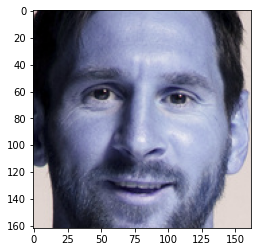

In [23]:
plt.imshow(cropped_img[0])

### Wavelet tranform of original image

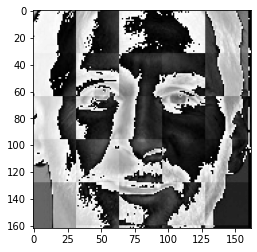

In [24]:
im_har = w2d(cropped_img[0],'db1',5)
plt.imshow(im_har,cmap='gray')

#### stacking the original image and wavelet transformed image vertically and storing the stacked image in a list (x) and a number corresponding the celebrity name in another list (y)

In [25]:
# since ML works on numbers, we have to assign each celebrity a number, celebDict will be storing the celeb name & corresp num.
celebDict = {}
count = 0
for celebName in celebrity_file_names_dict.keys():
    celebDict[celebName] = count
    count += 1
celebDict

{'lionel messi': 0,
 'maria sharapova': 1,
 'roger federer': 2,
 'serena williams': 3,
 'virat kohli': 4}

#### 'x' is the input and 'y' is the output, list 'x' contains the input images and list 'y' conatins numbers (for image stored at 0th index in 'x', 0th index in 'y' will tell which  celeb does this image belong to)

In [26]:
x,y = [],[]
for celebName,training_imgList in celebrity_file_names_dict.items():
    for training_img in training_imgList:
        #read the image from "training_img" path
        img = cv2.imread(training_img)
        
        if img is None:
            continue
        #scale or resize the input image, 32 is the length and 32 is width
        scaled_raw_img = cv2.resize(img,(32,32))
        #get the wavelet transformed image
        img_har = w2d(img,'db1',5)
        #scale it
        scaled_img_har = cv2.resize(img_har,(32,32))
        
        #stacking the images vertically (images can be stacked only when they have same dimensions hence reshape them)
        #32*32*3, here 3 is present because the raw img has some RGB and img_har is Gray so it does not have it
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        
        x.append(combined_img)
        y.append(celebDict[celebName])

In [27]:
x[0]

array([[60],
       [37],
       [45],
       ...,
       [35],
       [35],
       [34]], dtype=uint8)

In [28]:
print("Dimensions of raw img:",32*32*3, "\nDimensions of wavelet transformed image:",32*32,"\nToatl:",32*32*3 + 32*32)
print("x[0] is a vertically stacked image, it is a list of numbers, length of this list is the dimension of the stacked image")
len(x[0])

Dimensions of raw img: 3072 
Dimensions of wavelet transformed image: 1024 
Toatl: 4096
x[0] is a vertically stacked image, it is a list of numbers, length of this list is the dimension of the stacked image


4096

In [29]:
#convert the values in "x" from integer to float. Sklearn gives warnings when operating on integers instead of floats
x = np.array(x).reshape(len(x),4096).astype(float)
print(x.shape)
print(type(x[0]),x[0])

(210, 4096)
<class 'numpy.ndarray'> [60. 37. 45. ... 35. 35. 34.]


# Training the model

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=0)

### Use gridsearch to try different models with different parameters and see which one is best

In [32]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [33]:
models = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [34]:
scores = []
bestModel = {}

for algo,mp in models.items():
    pipe = make_pipeline(StandardScaler(),mp['model'])
    clf = GridSearchCV(pipe,mp['params'],cv=5,return_train_score = False)
    clf.fit(x_train,y_train)
    scores.append({
        'model' : algo,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    
    bestModel[algo] = clf.best_estimator_

In [35]:
import pandas as pd
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.726008,"{'svc__C': 1, 'svc__kernel': 'rbf'}"
1,random_forest,0.617742,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.739516,{'logisticregression__C': 1}


In [36]:
print('Score of different Algorithms on test data')
print('SVM score:',bestModel['svm'].score(x_test,y_test))
print('Logistic Regression score:',bestModel['logistic_regression'].score(x_test,y_test))
print('Random Forest score:',bestModel['random_forest'].score(x_test,y_test))

Score of different Algorithms on test data
SVM score: 0.7169811320754716
Logistic Regression score: 0.8490566037735849
Random Forest score: 0.6415094339622641


### The score of logistic regression is better on test data as well as during GridSearchCV, hence we will be using Logistic Regression

In [37]:
logRegression = bestModel['logistic_regression']
logRegression.fit(x_train,y_train)
logRegression.score(x_test,y_test)

0.8490566037735849

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logRegression.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.75      0.90      0.82        10
           2       0.88      0.78      0.82         9
           3       0.82      0.69      0.75        13
           4       0.91      0.91      0.91        11

    accuracy                           0.85        53
   macro avg       0.85      0.86      0.85        53
weighted avg       0.85      0.85      0.85        53



In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,logRegression.predict(x_test))
cm

array([[10,  0,  0,  0,  0],
       [ 0,  9,  0,  1,  0],
       [ 0,  1,  7,  1,  0],
       [ 1,  2,  0,  9,  1],
       [ 0,  0,  1,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'Actual')

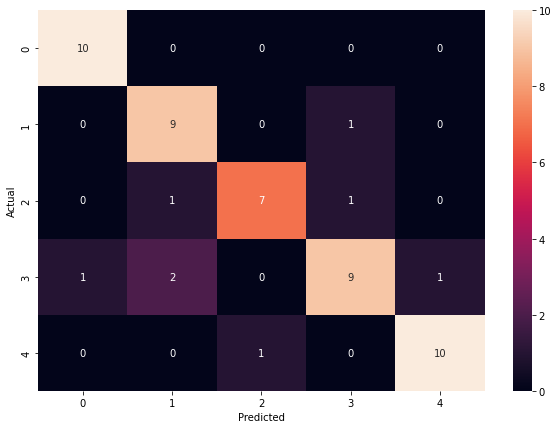

In [40]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [41]:
celebDict

{'lionel messi': 0,
 'maria sharapova': 1,
 'roger federer': 2,
 'serena williams': 3,
 'virat kohli': 4}

## Classify from user Input

In [42]:
celeb_num_to_name = {}
for name,num in celebDict.items():
    celeb_num_to_name[num] = name
celeb_num_to_name

{0: 'lionel messi',
 1: 'maria sharapova',
 2: 'roger federer',
 3: 'serena williams',
 4: 'virat kohli'}

In [43]:
def classify_image(image_path):
    imgs = get_cropped_img_if_2_eyes(image_path)

    result = []
    for img in imgs:
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))

        len_image_array = 32*32*3 + 32*32

        final = combined_img.reshape(1,len_image_array).astype(float)
        
        result.append({
            "Celebrity Name: ":celeb_num_to_name[logRegression.predict(final)[0]],
#             "Probability: ":(logRegression.predict_proba(final)*100).tolist()[0]
        })
    
    return result

### Prediction:

In [44]:
classify_image('C:/Users/kashif/Desktop/Celebrity Classifier/Virat_Kohli.jpg')

[{'Celebrity Name: ': 'virat kohli'}]

#### Model has predicted the image to be Virat Kohli. Let's verify that by importing the image using openCV and plotting it

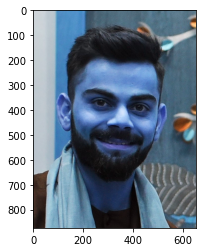

In [45]:
input_img = cv2.imread('C:/Users/kashif/Desktop/Celebrity Classifier/Virat_Kohli.jpg')
plt.imshow(input_img)

### As we can see our model prediction was correct, the iamge is of Virat Kohli